In [1]:
class Node:
    def __init__(self, name, h):
        self.name = name
        self.h = h

    def __repr__(self):
        return f"{self.name}(h={self.h})"

In [2]:
class Graph:
    def __init__(self):
        self.nodes = {}  
        self.edges = {}  

    def add_node(self, name, heuristic):
        self.nodes[name] = Node(name, heuristic)
        self.edges[name] = {}

    def add_edge(self, src, dst, cost):
        self.edges[src][dst] = cost

    def neighbors(self, name):
        return self.edges[name].items()

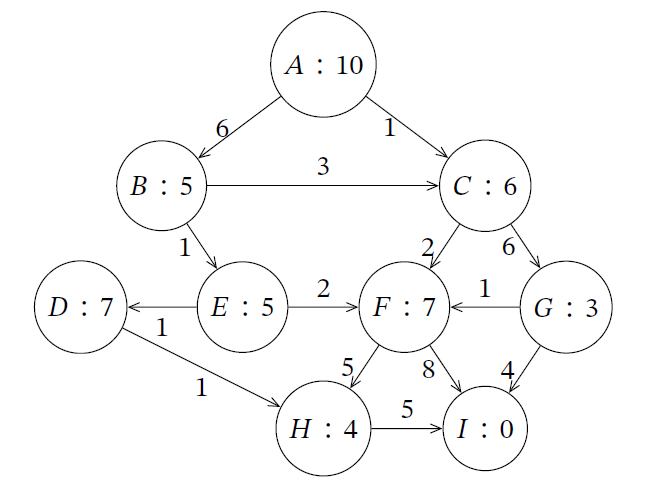

In [3]:
g = Graph()

g.add_node("A", 10)
g.add_node("B", 5)
g.add_node("C", 6)
g.add_node("D", 7)
g.add_node("E", 5)
g.add_node("F", 7)
g.add_node("G", 3)
g.add_node("H", 4)
g.add_node("I", 0)

g.add_edge("A", "B", 6)
g.add_edge("A", "C", 1)

g.add_edge("B", "C", 3)
g.add_edge("B", "E", 1)

g.add_edge("C", "F", 2)
g.add_edge("C", "G", 6)

g.add_edge("D", "H", 1)

g.add_edge("E", "D", 1)
g.add_edge("E", "F", 2)

g.add_edge("F", "H", 5)
g.add_edge("F", "I", 8)

g.add_edge("G", "I", 4)
g.add_edge("G", "F", 1)


g.add_edge("H", "I", 5)

In [4]:
from collections import deque

def bfs(graph, start, goal):
    fringe = deque([start])
    visited = set()
    parent = {start: None}
    path_cost = {start: 0}

    while fringe:
        current = fringe.popleft()

        # visited check only on pop
        if current in visited:
            continue

        print("Expanding", current)
        visited.add(current)

        if current == goal:
            break

        # alphabetical children
        children = sorted(graph.neighbors(current), key=lambda x: x[0])
        
        for child, cost in children:
            parent[child] = current
            path_cost[child] = path_cost[current] + cost
            fringe.append(child)

    if current != goal:
        print("No path")
        return None

    path = []
    node = goal
    while node is not None:
        path.append(node)
        node = parent[node]
    path.reverse()

    cost = path_cost[goal]
    print("Path:", path)
    print("Cost:", cost)
    return path, cost

In [5]:
def dfs(graph, start, goal):
    fringe = [start]
    visited = set()
    parent = {start: None}
    path_cost = {start: 0}

    while fringe:
        current = fringe.pop(0)

        # check on pop
        if current in visited:
            continue

        print("Expanding", current)
        visited.add(current)

        if current == goal:
            break

        children = sorted(graph.neighbors(current), key=lambda x: x[0])

        new_nodes = []
        for child, cost in children:
            parent[child] = current
            path_cost[child] = path_cost[current] + cost
            new_nodes.append(child)

        fringe = new_nodes + fringe

    if current != goal:
        print("No path")
        return None

    path = []
    node = goal
    while node is not None:
        path.append(node)
        node = parent[node]
    path.reverse()

    cost = path_cost[goal]
    print("Path:", path)
    print("Cost:", cost)
    return path, cost

In [6]:
import heapq

def ucs(graph, start, goal):
    # node = (label, cost)
    start_node = (start, 0)

    # priority queue elements: (cost, label, node)
    fringe = []
    heapq.heappush(fringe, (0, start, start_node))

    visited = set()
    parent = {start_node: None}

    while fringe:
        cost, _, node = heapq.heappop(fringe)
        label, g_cost = node

        # visited check only on pop
        if node in visited:
            continue

        print("Expanding", f"{label}@{g_cost}")
        visited.add(node)

        if label == goal:
            goal_node = node
            break

        # alphabetical children
        for child_label, edge_cost in sorted(graph.neighbors(label), key=lambda x: x[0]):
            new_cost = g_cost + edge_cost
            child_node = (child_label, new_cost)

            parent[child_node] = node
            heapq.heappush(fringe, (new_cost, child_label, child_node))

    else:
        print("No path")
        return None

    path = []
    node = goal_node
    while node is not None:
        path.append(node[0])
        node = parent[node]
    path.reverse()

    print("Path:", path)
    print("Cost:", goal_node[1])
    return path, goal_node[1]

In [7]:
import heapq

def greedy(graph, start, goal):
    # node = (label, h)
    start_node = (start, graph.nodes[start].h)

    # priority queue entries: (h, label, node)
    fringe = []
    heapq.heappush(fringe, (graph.nodes[start].h, start, start_node))

    visited = set()
    parent = {start_node: None}

    while fringe:
        h_val, _, node = heapq.heappop(fringe)
        label, _ = node

        # visited check only on pop
        if node in visited:
            continue

        print("Expanding", f"{label}@h={h_val}")
        visited.add(node)

        if label == goal:
            goal_node = node
            break

        # alphabetical children
        for child_label, cost in sorted(graph.neighbors(label), key=lambda x: x[0]):
            child_h = graph.nodes[child_label].h
            child_node = (child_label, child_h)

            parent[child_node] = node
            heapq.heappush(fringe, (child_h, child_label, child_node))

    else:
        print("No path")
        return None

    path = []
    node = goal_node
    while node is not None:
        path.append(node[0])
        node = parent[node]
    path.reverse()

    # recompute path cost manually
    total_cost = 0
    for a, b in zip(path, path[1:]):
        # find cost of edge a -> b
        total_cost += graph.edges[a][b]

    print("Path:", path)
    print("Cost:", total_cost)
    return path, total_cost

In [8]:
import heapq

def astar(graph, start, goal):
    start_h = graph.nodes[start].h
    start_node = (start, 0, start_h)  # (label, g, h)

    fringe = []
    heapq.heappush(fringe, (start_h, start, start_node))

    visited = set()
    parent = {start_node: None}

    while fringe:
        f, _, node = heapq.heappop(fringe)
        label, g, h = node

        if node in visited:
            continue

        print("Expanding", f"{label}@g={g},h={h},f={f}")
        visited.add(node)

        if label == goal:
            goal_node = node
            break

        # alphabetical children
        for child_label, edge_cost in sorted(graph.neighbors(label), key=lambda x: x[0]):
            child_g = g + edge_cost
            child_h = graph.nodes[child_label].h
            child_node = (child_label, child_g, child_h)

            parent[child_node] = node
            child_f = child_g + child_h
            heapq.heappush(fringe, (child_f, child_label, child_node))

    else:
        print("No path")
        return None

    # reconstruct path
    path = []
    node = goal_node
    while node is not None:
        path.append(node[0])
        node = parent[node]
    path.reverse()

    total_cost = goal_node[1]  # g-cost

    print("Path:", path)
    print("Cost:", total_cost)
    return path, total_cost

In [9]:
bfs(g, "A", "I")

Expanding A
Expanding B
Expanding C
Expanding E
Expanding F
Expanding G
Expanding D
Expanding H
Expanding I
Path: ['A', 'B', 'E', 'D', 'H', 'I']
Cost: 14


(['A', 'B', 'E', 'D', 'H', 'I'], 14)

In [10]:
dfs(g, "A", "I")

Expanding A
Expanding B
Expanding C
Expanding F
Expanding H
Expanding I
Path: ['A', 'B', 'C', 'F', 'H', 'I']
Cost: 21


(['A', 'B', 'C', 'F', 'H', 'I'], 21)

In [11]:
ucs(g, "A", "I")

Expanding A@0
Expanding C@1
Expanding F@3
Expanding B@6
Expanding E@7
Expanding G@7
Expanding D@8
Expanding F@8
Expanding H@8
Expanding C@9
Expanding F@9
Expanding H@9
Expanding F@11
Expanding I@11
Path: ['A', 'C', 'G', 'I']
Cost: 11


(['A', 'C', 'G', 'I'], 11)

In [12]:
greedy(g, "A", "I")

Expanding A@h=10
Expanding B@h=5
Expanding E@h=5
Expanding C@h=6
Expanding G@h=3
Expanding I@h=0
Path: ['A', 'B', 'C', 'G', 'I']
Cost: 19


(['A', 'B', 'C', 'G', 'I'], 19)

In [13]:
astar(g, "A", "I")

Expanding A@g=0,h=10,f=10
Expanding C@g=1,h=6,f=7
Expanding F@g=3,h=7,f=10
Expanding G@g=7,h=3,f=10
Expanding B@g=6,h=5,f=11
Expanding I@g=11,h=0,f=11
Path: ['A', 'C', 'G', 'I']
Cost: 11


(['A', 'C', 'G', 'I'], 11)